# Final Project

**Due date: Saturday, December 9th**

For your final project you will develop a data narrative with a dataset of your choosing. Your data can come from any source. You do not have to comprehensively explore your data. Pick an interesting aspect or two from which to build your narrative.

## Requirements

- At least **three** visualizations. Visualizations can be simple bar charts that total data categories or rich exploratory figures. (*Tables also count as visualizations but you must have at least two charts.*) 
- All of the code should be recorded in your narrative. That is, I should be able to run your notebook code start to finish re-producing each of your outputs without error.
- At least **two** but no more than **three** paragraphs walking the reader through your analysis.
- Charts should exhibit your command of `ggplot2/dplyr/forcats/tidyr` with: 
  - sensibly sorted categories, 
  - interpretable labels/axis titles, 
  - useful annotations (when applicable), 
  - adjustments to default chart aesthetics, 
  - appropriate markings (e.g. `geoms`) and encodings.

## Notes

*This project should not take you longer than the time to complete two of our assignments. It is meant to demonstrate that you can build an analysis using `R` and the `Tidyverse` from scratch. Focus your analysis on a small number of data features that you find interesting.*

*Remember all the ways of visualizing distributions (ECDFs, histograms, jitter-ed scatter plots, etc.). These will come in very handy!* 

In [1]:
library('tidyverse')

Warning message:
“Failed to locate timezone database”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
df_chocolate = read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2022/2022-01-18/chocolate.csv',
        col_types = cols()
 )                    
df_chocolate |> 
    arrange(ref)

ref,company_manufacturer,company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,ingredients,most_memorable_characteristics,rating
<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
5,Jacque Torres,U.S.A.,2006,Ghana,Trinatario Treasure,71%,"5- B,S,C,V,L","gritty, unrefined, off notes",2.00
15,Green & Black's (ICAM),U.K.,2006,Blend,Dark,70%,"5- B,S,C,V,L","mildly rich, basic, roasty",2.50
15,Guittard,U.S.A.,2006,Colombia,Chucuri,65%,"5- B,S,C,V,L","creamy, sweet, floral, vanilla",3.00
15,Neuhaus (Callebaut),Belgium,2006,Blend,West Africa,73%,"5- B,S,C,V,L","non descript, poor aftertaste",2.00
15,Neuhaus (Callebaut),Belgium,2006,Sao Tome,Sao Tome,75%,"5- B,S,C,V,L","grassy, earthy, burnt",2.75
15,Scharffen Berger,U.S.A.,2006,Blend,Extra Dark,82%,"5- B,S,C,V,L","dry, bitter, poor aftertaste",2.00
15,Scharffen Berger,U.S.A.,2006,Blend,Bittersweet,70%,"5- B,S,C,V,L","cherry, mild bitter",3.50
24,Bonnat,France,2006,Blend,"Carribean, Trinite",75%,"3- B,S,C","spice, woodsy, long lasting",3.75
24,Michel Cluizel,France,2006,Blend,Carre Amer,60%,"4- B,S,C,V","sweet, crisp nibs",2.00


The first visualization (above) is a table listing the variables used in this dataset. Each line in this file is a different chocolate which has been given a rating on a 1-5 scale and also includes information such as the country that the cocoa bean originated from, the manufacturing company, the year the review was completed, cocoa percentage, and tasting characteristics. The second visualization (below) is a bar chart indicating the average rating given to the sampled chocolate, by the bean origin country.From the chart, we can see that the average ratings are fairly similar for a majority of the countries. However there are some standouts such as Tobago with a high average rating and Puerto Rico with the lowest average rating.

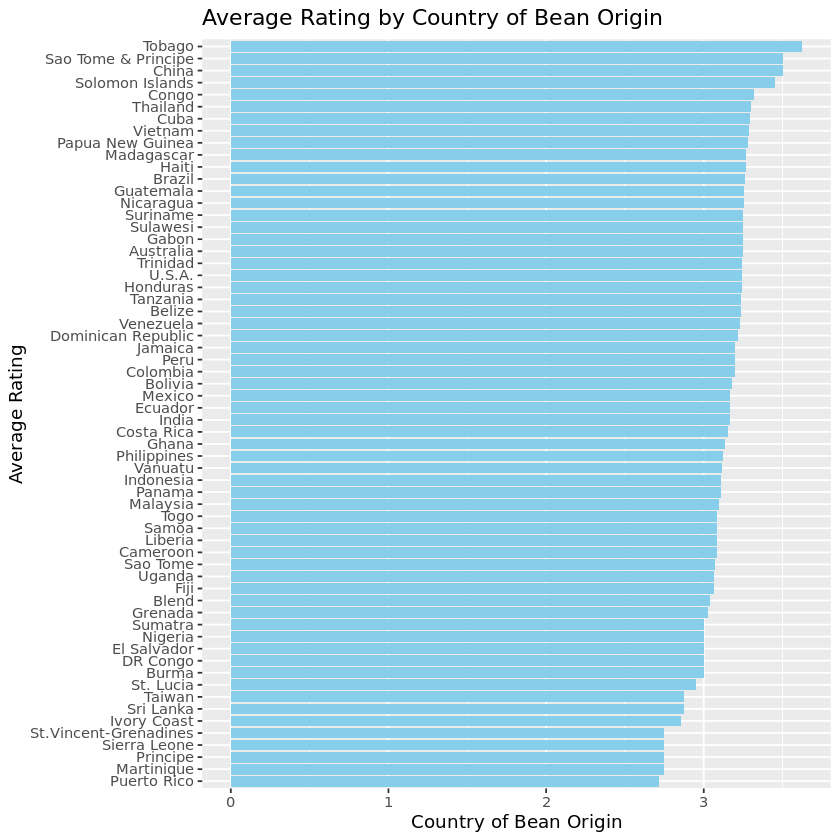

In [3]:
df_chocolate %>%
  group_by(country_of_bean_origin) %>%
  summarize(avg_rating = mean(rating, na.rm = TRUE)) %>%
 ggplot(aes(x = reorder(country_of_bean_origin, avg_rating), y = avg_rating)) +
  geom_bar(stat = "identity", fill = "skyblue") +
  coord_flip() +  # To make it a horizontal bar plot
  labs(title = "Average Rating by Country of Bean Origin",
       x = "Average Rating",
       y = "Country of Bean Origin")


The final visualization in this file is a bar chart in which the results have been grouped by the countries from which the beans used to make the chocolate originated. The X-axis displays the count of how many reviewed chocolates came from each country. From this chart, we can see that the most popular countries to source cocoa beans from in this sampling were Venezuala, Peru, the Dominican Republic, and Ecuador as the top 4 countries with over 200 entries each.

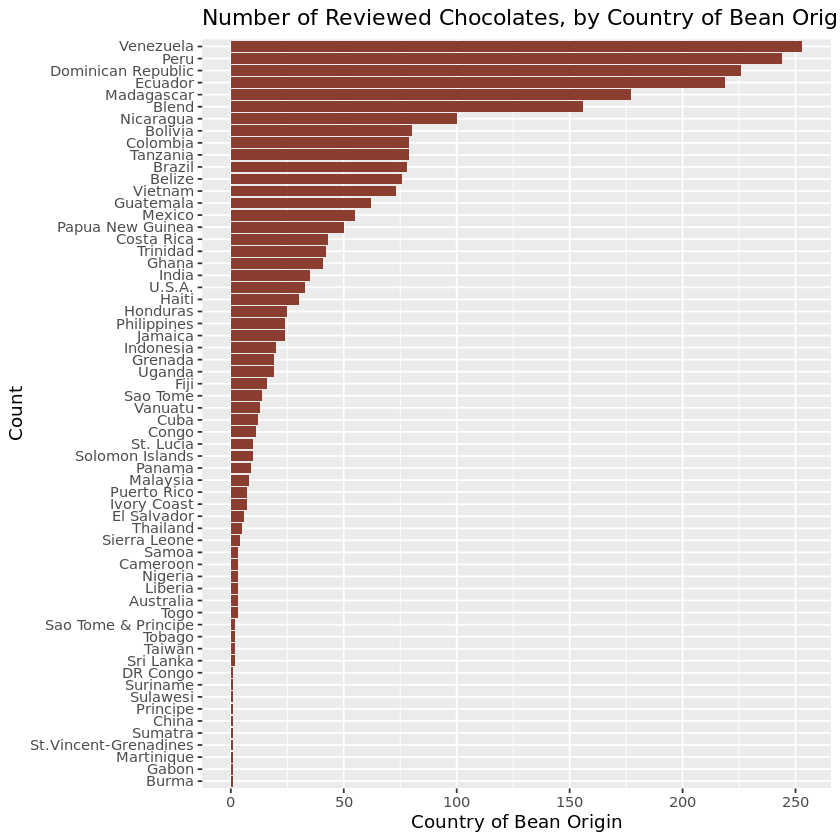

In [4]:
df_chocolate_sorted = df_chocolate %>%
    group_by(country_of_bean_origin) %>%
    mutate(n = n()) %>%
    ungroup() %>% 
    arrange(n) %>%
    mutate(country_sorted = fct_inorder(country_of_bean_origin))
           
p = ggplot(df_chocolate_sorted, aes(x = country_sorted))

p = p + geom_bar(fill = "coral4") + coord_flip() +  
    labs(title = "Number of Reviewed Chocolates, by Country of Bean Origin",
       x = "Count",
       y = "Country of Bean Origin")

p